<a href="https://colab.research.google.com/github/akalpit23/Interpretable-ML/blob/main/Assignment-4/Assignment_04_Interpretable_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #04



## Akalpit Dawkhar

### **Interpretable ML-2**

### Overview

# 1. Importing neccesarry libraries, loading and preprocessing the data. 

In [319]:
!pip install skope-rules shap lime scikit-learn seaborn skope-rules matplotlib setuptools six rulefit --upgrade
!pip install --upgrade imodels
!pip install interpret
!pip install collections
!pip show imodels graphviz


/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning:

This process (pid=85550) is multi-threaded, use of forkpty() may lead to deadlocks in the child.



/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning:

This process (pid=85550) is multi-threaded, use of forkpty() may lead to deadlocks in the child.



/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning:

This process (pid=85550) is multi-threaded, use of forkpty() may lead to deadlocks in the child.



/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning:

This process (pid=85550) is multi-threaded, use of forkpty() may lead to deadlocks in the child.



ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning:

This process (pid=85550) is multi-threaded, use of forkpty() may lead to deadlocks in the child.



Name: imodels
Version: 1.4.6
Summary: Implementations of various interpretable models
Home-page: https://github.com/csinva/imodels
Author: Chandan Singh, Keyan Nasseri, Matthew Epland, Yan Shuo Tan, Omer Ronen, Tiffany Tang, Abhineet Agarwal, Theo Saarinen, Bin Yu, and others
Author-email: chandan_singh@berkeley.edu
License: 
Location: /Users/akalpitdawkhar/Desktop/School/SEM 3/XAI/Interpretable-ML/xai/lib/python3.12/site-packages
Requires: matplotlib, mlxtend, numpy, pandas, requests, scikit-learn, scipy, tqdm
Required-by: 
---
Name: graphviz
Version: 0.20.3
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: /Users/akalpitdawkhar/Desktop/School/SEM 3/XAI/Interpretable-ML/xai/lib/python3.12/site-packages
Requires: 
Required-by: 


In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime
import sklearn
import collections
import demo_helper
import six
import os
import graphviz
collections.Iterable = collections.abc.Iterable
sklearn.externals.six = six
from scipy.io import arff
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler ,OneHotEncoder, label_binarize, KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, roc_auc_score
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn import tree
from itertools import cycle
import skrules.skope_rules
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import six
from imodels import  RuleFitRegressor, BoostedRulesClassifier, GreedyRuleListClassifier, GreedyTreeClassifier, GreedyTreeRegressor, OneRClassifier , HSTreeClassifierCV
from rulefit import RuleFit
from skrules import SkopeRules
from skrules import SkopeRules as SkopeRulesClassifier
from c45 import C45
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from interpret.glassbox import APLRClassifier
from interpret import show


In [322]:
def patched_init(*args, **kwargs):
     """
    Patched __init__ method for BaggingClassifier in the skrules.skope_rules module.

    This patch modifies the constructor (__init__) of the BaggingClassifier class to ensure
    compatibility with updated scikit-learn or model APIs. Specifically, it renames the 
    'base_estimator' argument to 'estimator', as some versions of libraries may expect 
    'estimator' instead of 'base_estimator'.

    Parameters:
    *args: tuple
        Positional arguments that are passed to the original __init__ method of 
        BaggingClassifier.

    **kwargs: dict
        Keyword arguments that are passed to the original __init__ method of 
        BaggingClassifier. If 'base_estimator' is provided, it is renamed to 'estimator'
        before passing to the original __init__ method.

    Returns:
    object
        The initialized BaggingClassifier object after calling the original __init__ 
        with modified arguments, if applicable.

    Notes:
    ------
    This patch is useful for maintaining backward compatibility with older versions of 
    code or when there is a naming conflict in the API. It modifies the constructor at 
    runtime without directly altering the source code of the `imodels` or `skrules` library.
    """
    if 'base_estimator' in kwargs:
        kwargs['estimator'] = kwargs.pop('base_estimator')
    return original_init(*args, **kwargs)

original_init = skrules.skope_rules.BaggingClassifier.__init__
skrules.skope_rules.BaggingClassifier.__init__ = patched_init

IndentationError: unindent does not match any outer indentation level (<string>, line 31)

In [323]:
def patch_estimator(cls):
    """
    Patched initialization method for BaggingClassifier in the skrules.skope_rules module.

    This function modifies the '__init__' method of the BaggingClassifier class to replace 
    the 'base_estimator' keyword argument with 'estimator' to maintain compatibility 
    with updated API changes or requirements in the 'skrules.skope_rules' package.

    Parameters:
    *args: tuple
        Positional arguments passed to the original __init__ method of BaggingClassifier.
        
    **kwargs: dict
        Keyword arguments passed to the original __init__ method of BaggingClassifier.
        If 'base_estimator' is present in the kwargs, it is replaced with 'estimator'.

    Returns:
    The result of calling the original __init__ method of BaggingClassifier with modified 
    arguments and keyword arguments.
    
    Notes:
    This patch is necessary because some versions of scikit-learn and other model 
    implementations may use 'estimator' instead of 'base_estimator'. This ensures 
    compatibility without modifying the underlying library directly.
    """
    original_init = cls.__init__
    def patched_init(*args, **kwargs):
        if 'base_estimator' in kwargs:
            kwargs['estimator'] = kwargs.pop('base_estimator')
        return original_init(*args, **kwargs)
    cls.__init__ = patched_init

patch_estimator(skrules.skope_rules.BaggingClassifier)
patch_estimator(skrules.skope_rules.BaggingRegressor)

In [327]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert the continuous target to binary
y_median = np.median(diabetes.target)
y = (diabetes.target > y_median).astype(int)  # labels 0-1

# Prepare the feature data
X = diabetes.data.astype('float32')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)  # split


In [331]:
# Convert to DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Print the first 5 rows
print(diabetes_df.head())

# Get the feature names
f_names = diabetes.feature_names

# Define the original feature names
o_names = ["age", "sex", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [326]:
# Check the shape of your DataFrame
print(X_train.shape)

# Check the column names of your DataFrame
print(diabetes_df.columns)

(110, 10)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


# 2. RuleFit rule sit 

In [332]:
# Initialize the RuleFitRegressor
rf = RuleFitRegressor(max_rules=10, memory_par=0.01, tree_size=4, lin_standardise=True)

# Fit the model to your data
rf.fit(X_train, y_train, feature_names=o_names)

RuleFitRegressor(max_rules=10)

In [333]:
# Use the model to make predictions
predictions = rf.predict(X_test)

In [334]:
rule_df = rf.visualize()
rule_df

,rule,coef
18,bp > -0.06076 and ltg > -0.01653,0.01
10,age > -0.08725 and bmi <= 0.01912 and tch <= 0.03136,-0.02
16,bmi <= 0.00781 and ltg <= 0.02571,-0.02
17,hdl > -0.01579 and ltg <= 0.02473,-0.11
12,age > -0.08543 and hdl > -0.01579 and ltg <= 0.02571,-0.00
13,tch <= 0.00036 and ltg <= -0.00632,-0.03
11,bp <= 0.0804 and tch <= 0.01586 and ltg <= -0.01653,-0.12
15,bmi <= 0.03583 and hdl > -0.01579 and ltg <= -0.00704,-0.04
14,sex > 0.00302 and tch <= 0.05276 and ltg <= 0.02604,-0.01


In [335]:
# Inspect and print the rules
print('Rulefit visualization:')
rules = rf._get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
display(rules[['rule', 'coef', 'support']].style.background_gradient(cmap='Blues'))

Rulefit visualization:


,rule,coef,support
18,bp > -0.06076 and ltg > -0.01653,0.011527,0.554545
10,age > -0.08725 and bmi <= 0.01912 and tch <= 0.03136,-0.019726,0.518182
16,bmi <= 0.00781 and ltg <= 0.02571,-0.021949,0.500000
17,hdl > -0.01579 and ltg <= 0.02473,-0.110647,0.472727
12,age > -0.08543 and hdl > -0.01579 and ltg <= 0.02571,-0.004556,0.445455
13,tch <= 0.00036 and ltg <= -0.00632,-0.033785,0.427273
11,bp <= 0.0804 and tch <= 0.01586 and ltg <= -0.01653,-0.124178,0.372727
15,bmi <= 0.03583 and hdl > -0.01579 and ltg <= -0.00704,-0.038907,0.372727
14,sex > 0.00302 and tch <= 0.05276 and ltg <= 0.02604,-0.006797,0.272727


In [336]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

# Calculate the R-squared score
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MAE: 0.4324356050963414
MSE: 0.20704594919059824
R2 Score: 0.1710641566385347


# 3. Greedy Rule List Classifier 

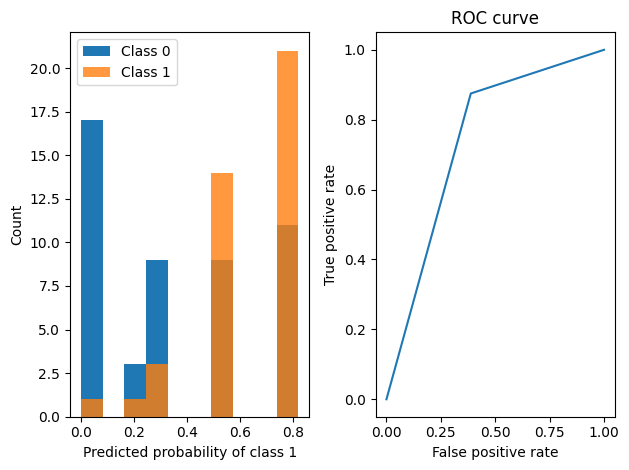

GreedyRuleListClassifier()

In [353]:
# fit a greedy rule list
greedy_model = GreedyRuleListClassifier()
greedy_model.fit(X_train, y_train, feature_names=o_names)  # stores into m.rules_
probability_grlc = greedy_model.predict_proba(X_test)

# look at prediction breakdown
demo_helper.viz_classification_preds(probability_grlc, y_test)

m

# 4. Automatic Piecewise Linear Regression (APLR) (Sub-section of Tree GAM)

In [342]:
seed = 42
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=seed
)

aplr = APLRClassifier(random_state=seed)
aplr.fit(X_train, y_train, X_names=o_names)

auc = roc_auc_score(y_test, aplr.predict_class_probabilities(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.804


In [343]:
show(aplr.explain_local(X_test[:5], y_test[:5]))

# 5. Greedy Tree Regressor 

In [340]:
# Fit the model to the training data
gtr_model = GreedyTreeRegressor()
gtr_model.fit(X_train, y_train)

# Get the predictions
y_pred_gtr = gtr_model.predict(X_test)

# Calculate the accuracy
accuracy_greedytree = accuracy_score(y_test, y_pred_gtr)
print(f"GreedyTreeRegressor: {accuracy_greedytree}")

GreedyTreeRegressor: 0.6741573033707865


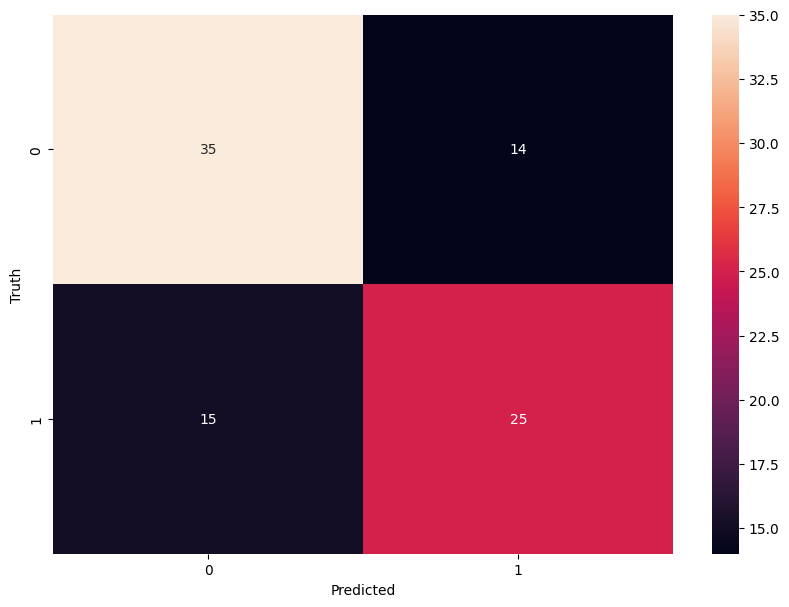

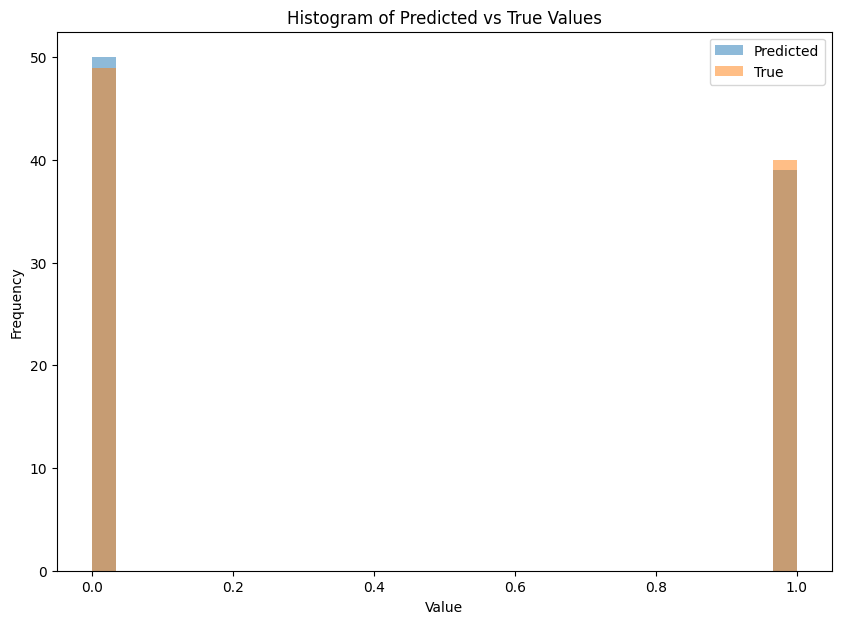

In [348]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_gtr)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

plt.figure(figsize=(10, 7))

# Plot a histogram of the predicted values
plt.hist(y_pred_gtr, bins=30, alpha=0.5, label='Predicted')

# Plot a histogram of the true values
plt.hist(y_test, bins=30, alpha=0.5, label='True')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of Predicted vs True Values')
plt.show()

# 6. Refrences:
